In [20]:
import requests
import base64
import matplotlib.pyplot as plt
import numpy as np
import cv2
import json


# encode image as base64 string
def encode_image(image):
    _, encoded_image = cv2.imencode(".jpg", image)
    return "data:image/jpeg;base64," + base64.b64encode(encoded_image).decode()

# decode base64 string to image
def decode_image(image_string):
    encoded_data = image_string.split(',')[1]
    nparr = np.frombuffer(base64.b64decode(encoded_data), np.uint8)
    return cv2.imdecode(nparr, cv2.IMREAD_COLOR)



image_file = 'photo.jpg'
url        = "http://localhost:8000"


# Load the image
image        = cv2.imread(image_file)
image        = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_string = encode_image(image)

payload = {
    "image": image_string,
    "name": "John",
    "surname": "Doe",
    "numbers": [1, 2, 3, 4, 5]
}

response = requests.post(f"{url}/process-image", json=payload)
data = json.loads(response.content)

processed_image_string = data["processed_image"]
processed_image        = decode_image(processed_image_string)




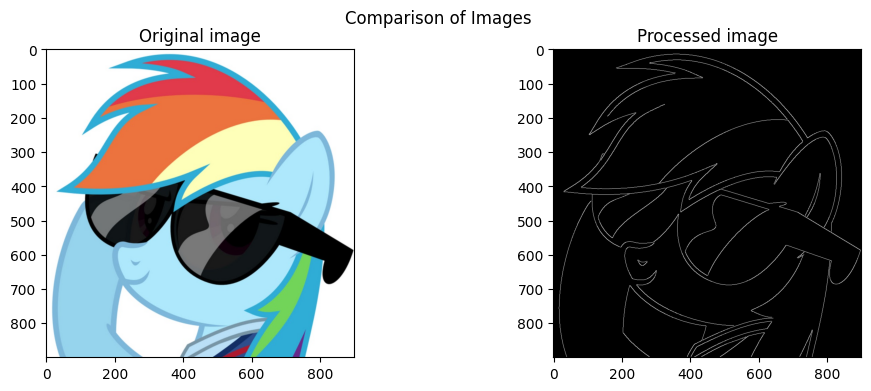

In [21]:

# Create a figure and set the title
fig = plt.figure(figsize=(12, 4))
fig.suptitle('Comparison of Images')

# Add the first image to the left subplot
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(image)
ax1.set_title('Original image')

# Add the second image to the right subplot
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(processed_image)
ax2.set_title('Processed image')

# Show the plot
plt.show()

In [22]:
import os
from flask import Flask, render_template

app = Flask(__name__,template_folder="")


@app.route('/')
def home():
   
   # env_var_colour = os.environ['APP_COLOR']
   
   # return render_template("index.html")
   return render_template("index.html", mycontent=image_string)
    

# @app.route('/<string:name>')
# def template(name):
#     return render_template("index.html", color=name)
    

if __name__ == '__main__':
    app.run(host="0.0.0.0",port="8081")


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8081
 * Running on http://192.168.1.49:8081
Press CTRL+C to quit
127.0.0.1 - - [26/Mar/2023 20:44:20] "GET / HTTP/1.1" 200 -
